# Machine Learning with the Famous Iris Dataset
Yes, I know this dataset has been analysed in its entirety over the years but as someone who is new to ML, everyone should get familiar with this dataset. Also, I wanted to create a simple web-app using flask to predict the iris species as a beginner's project. This dataset is particularly handy for newbies because there are very few features present. It is good to explore and play with the data using pandas. It is also good for learning basic visualization techniques such as barplots, histograms, boxplots and many more using matplotlib and seaborn.

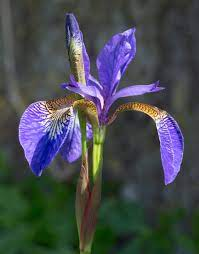


## Who should read this notebook?
* If you are new to ML and want to understand the fundamentals of EDA, model building and deployment, then you have come to the right place
* Since this is a very basic dataset, I cannot cover every single topic such as feature engineering, feature selection, handling missing values, outlier analyis, encoding techniques, etc.


## Overview
The Iris dataset was used in **R.A. Fisher's** classic 1936 paper, *'The Use of Multiple Measurements in Taxonomic Problems'*, and can also be found on the UCI Machine Learning Repository. It is sometimes called **Anderson's** Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
* Id
* SepalLength (Cm)
* SepalWidth (Cm)
* PetalLength (Cm)
* PetalWidth (Cm)
* Species

**Goal:** We have to classify the iris flower based on the features present in the dataset. Since this is a classification problem we will use some popular ML algorithms such as Logistic Regression, KNN, SVM and Decision Tree.


## Table of Contents
* Import Basic Libraries and Dataet
* Data Cleaning and EDA  
  * Data Preprocessing
  * Missing Values
  * Numerical Features
  * Categorical Features
  * Univariate Analysis
  * Bivariate Analysis
* Model Building Using all the Features
* Model Building Using Petal Features
* Model Building Using Sepal Features
* Pickle File
 


## 1. Import Basic Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset into a dataframe
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Data Cleaning and EDA

### 2.1 Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
df.shape

(150, 6)

In [6]:
#We'll drop the Id column since it doesn't give any information
df.drop('Id',axis=1,inplace=True)

### 2.2 Missing Values

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Since there are no missing values, we can move towards exploring the data.**

### 2.3 Numerical Features

c:\users\mahe\anaconda3\envs\irisflower\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\mahe\anaconda3\envs\irisflower\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\mahe\anaconda3\envs\irisflower\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

Text(0.5, 0, 'PetalWidthCm')

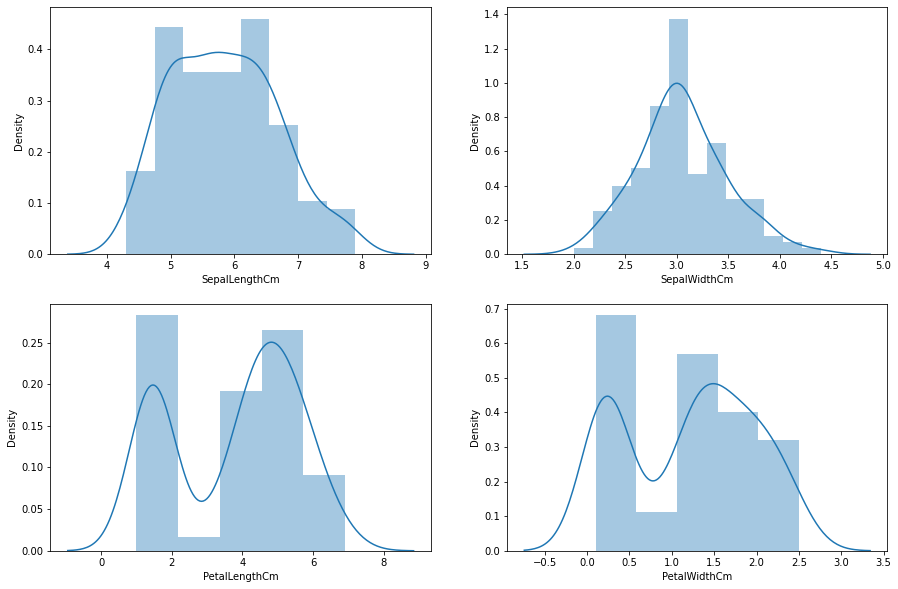

In [8]:
#So our independent features are all numerical, let's try to see their distributions.
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'])
plt.xlabel('SepalWidthCm')
plt.subplot(2,2,3)
sns.distplot(df['PetalLengthCm'])
plt.xlabel('PetalLengthCm')
plt.subplot(2,2,4)
sns.distplot(df['PetalWidthCm'])
plt.xlabel('PetalWidthCm')

**Observations**
* We can see that SepalLength and SepalWidth are normally distributed.
* PetalLength and PetalWidth have a somewhat skewed distribution

Text(0, 0.5, 'Species')

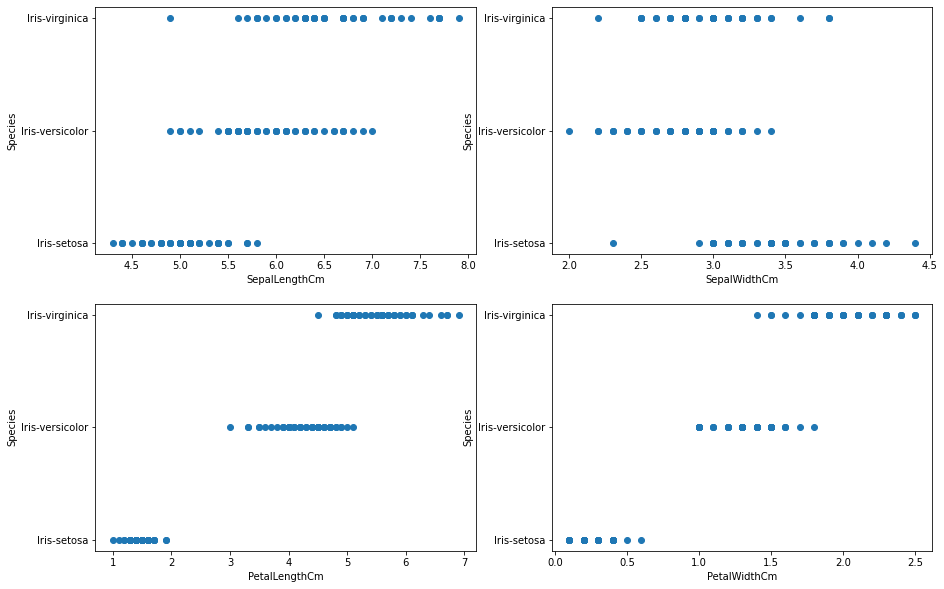

In [9]:
#Now let us look at scatterplots with respect to target variable.
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(df['SepalLengthCm'],df['Species'])
plt.xlabel('SepalLengthCm')
plt.ylabel('Species')
plt.subplot(2,2,2)
plt.scatter(df['SepalWidthCm'],df['Species'])
plt.xlabel('SepalWidthCm')
plt.ylabel('Species')
plt.subplot(2,2,3)
plt.scatter(df['PetalLengthCm'],df['Species'])
plt.xlabel('PetalLengthCm')
plt.ylabel('Species')
plt.subplot(2,2,4)
plt.scatter(df['PetalWidthCm'],df['Species'])
plt.xlabel('PetalWidthCm')
plt.ylabel('Species')

**Observation**
* As per SepalLength and SepalWidth the flowers are not easily distinguished. The datapoints overlap.
* As per PetalLength and PetalWidth, setosa has the smallest values. It is difficult to distinguish versicolor and virginica since points seem to overlap.

<AxesSubplot:>

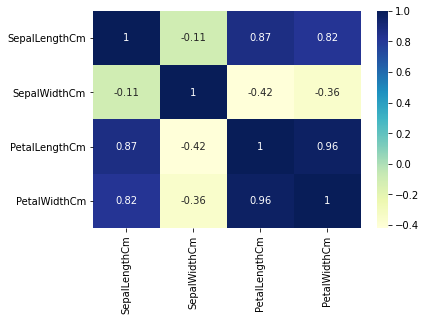

In [10]:
#Let's see the correlation among the features using a heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

**Observations**
* PetalLength and PetalWidth are highly correlated
* SepalLength and PetalLength are also highly correlated
* So we will try to use all features to train the model and then one feature from petal and sepal each to train the model in order to avoid multicollinearity scenario.

### 2.4 Categorical Features

In [11]:
#We only have one categorical feature that is our target variable
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

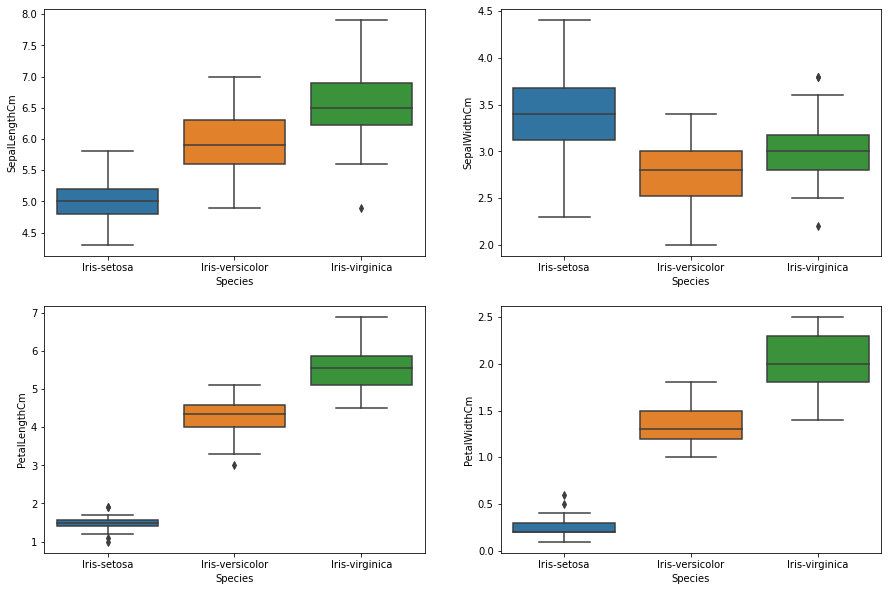

In [12]:
#Let's try to visualize our target variable using boxplots
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)

**Observations**
* On average Virginca has the highest SepalLength, PetalLength and PetalWidth
* On average Setosa has the highest SepalWidth

### 2.5 Univariate Analysis

In [13]:
df_setosa = df.loc[df['Species']=='Iris-setosa']
df_versicolor = df.loc[df['Species']=='Iris-versicolor']
df_virginica = df.loc[df['Species']=='Iris-virginica']

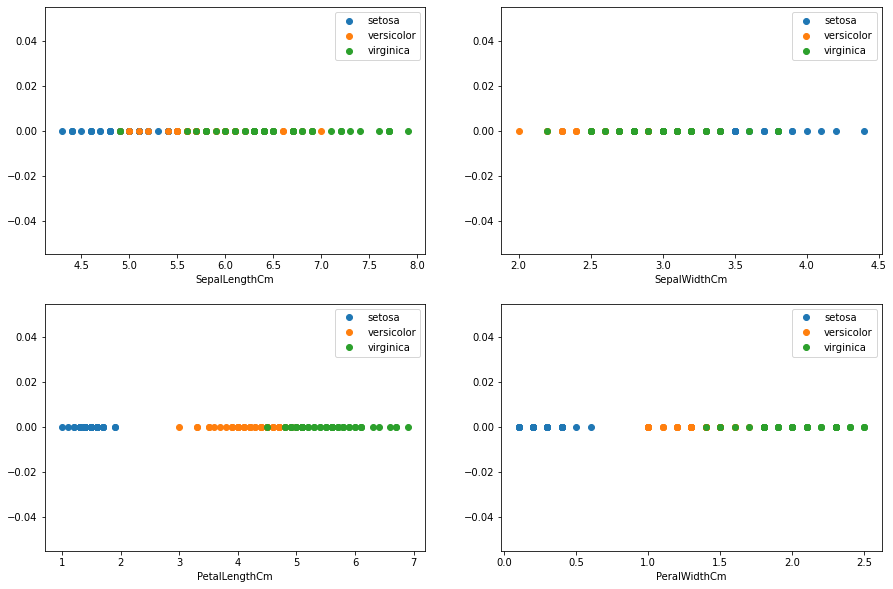

In [14]:
#We are setting the scale to zero
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(df_setosa['SepalLengthCm'],np.zeros_like(df_setosa['SepalLengthCm']),'o')
plt.plot(df_versicolor['SepalLengthCm'],np.zeros_like(df_versicolor['SepalLengthCm']),'o')
plt.plot(df_virginica['SepalLengthCm'],np.zeros_like(df_virginica['SepalLengthCm']),'o')
plt.xlabel('SepalLengthCm')
plt.legend(['setosa','versicolor','virginica'])
plt.subplot(2,2,2)
plt.plot(df_setosa['SepalWidthCm'],np.zeros_like(df_setosa['SepalWidthCm']),'o')
plt.plot(df_versicolor['SepalWidthCm'],np.zeros_like(df_versicolor['SepalWidthCm']),'o')
plt.plot(df_virginica['SepalWidthCm'],np.zeros_like(df_virginica['SepalWidthCm']),'o')
plt.xlabel('SepalWidthCm')
plt.legend(['setosa','versicolor','virginica'])
plt.subplot(2,2,3)
plt.plot(df_setosa['PetalLengthCm'],np.zeros_like(df_setosa['PetalLengthCm']),'o')
plt.plot(df_versicolor['PetalLengthCm'],np.zeros_like(df_versicolor['PetalLengthCm']),'o')
plt.plot(df_virginica['PetalLengthCm'],np.zeros_like(df_virginica['PetalLengthCm']),'o')
plt.xlabel('PetalLengthCm')
plt.legend(['setosa','versicolor','virginica'])
plt.subplot(2,2,4)
plt.plot(df_setosa['PetalWidthCm'],np.zeros_like(df_setosa['PetalWidthCm']),'o')
plt.plot(df_versicolor['PetalWidthCm'],np.zeros_like(df_versicolor['PetalWidthCm']),'o')
plt.plot(df_virginica['PetalWidthCm'],np.zeros_like(df_virginica['PetalWidthCm']),'o')
plt.xlabel('PeralWidthCm')
plt.legend(['setosa','versicolor','virginica'])

### 2.6 Bivariate Analysis

c:\users\mahe\anaconda3\envs\irisflower\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\mahe\anaconda3\envs\irisflower\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


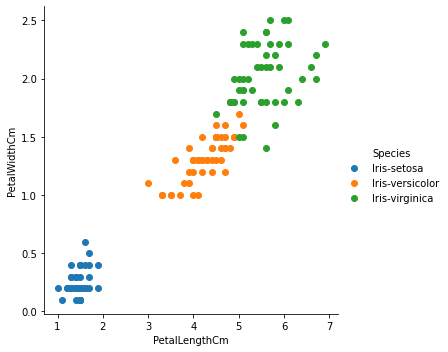

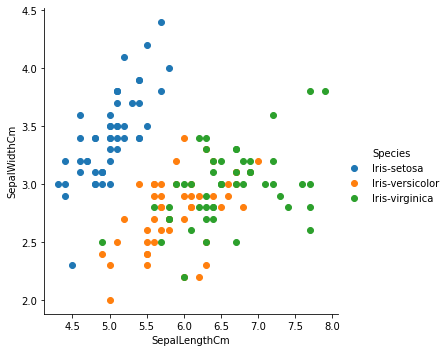

In [15]:
sns.FacetGrid(df,hue='Species',size=5).map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
sns.FacetGrid(df,hue='Species',size=5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

**Observations**: We can see that Petal Characteristics are forming a more distinguished cluster compared to Sepal Characteristics. This indicates Petals are a better predictor for our classification problem.

## 3. Model Building Using all the Features
Since this is a classification problem, we'll implement some of the commonly used algorithms such as Logistic Regression, K-Nearest Neighbors, Support Vector Machine and Decision Tree

In [16]:
#Seperate dependent and independent features
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [17]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [19]:
#Split the data into training and testing dataset using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [20]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
121,5.6,2.8,4.9,2.0
62,6.0,2.2,4.0,1.0
148,6.2,3.4,5.4,2.3
86,6.7,3.1,4.7,1.5
99,5.7,2.8,4.1,1.3


In [21]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
104,6.5,3.0,5.8,2.2
33,5.5,4.2,1.4,0.2
116,6.5,3.0,5.5,1.8
24,4.8,3.4,1.9,0.2
81,5.5,2.4,3.7,1.0


In [22]:
y_train.head()

121     Iris-virginica
62     Iris-versicolor
148     Iris-virginica
86     Iris-versicolor
99     Iris-versicolor
Name: Species, dtype: object

In [23]:
y_test.head()

104     Iris-virginica
33         Iris-setosa
116     Iris-virginica
24         Iris-setosa
81     Iris-versicolor
Name: Species, dtype: object

### 3.1 Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression has an accuracy of:',accuracy_score(y_test,y_pred)*100)

Logistic Regression has an accuracy of: 93.33333333333333


c:\users\mahe\anaconda3\envs\irisflower\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.2 K-Nearest Neighbors (KNN)

In [25]:
#For K=1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('KNN with K=1 has an accuracy of:',accuracy_score(y_test,y_pred)*100)

KNN with K=1 has an accuracy of: 95.55555555555556


In [26]:
#For K=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('KNN with K=3 has an accuracy of:',accuracy_score(y_test,y_pred)*100)

KNN with K=3 has an accuracy of: 95.55555555555556


In [27]:
#For K=5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('KNN with K=5 has an accuracy of:',accuracy_score(y_test,y_pred)*100)

KNN with K=5 has an accuracy of: 95.55555555555556


Text(0, 0.5, 'Accuracy Score')

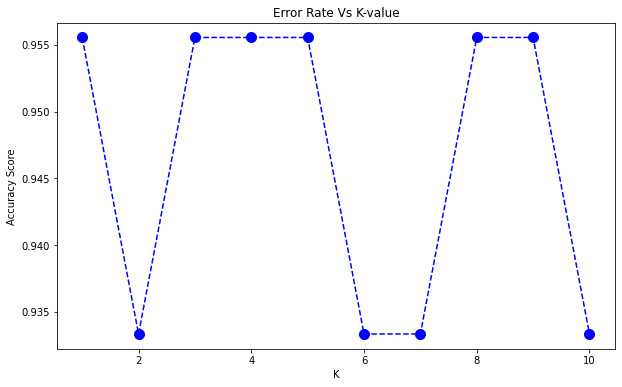

In [28]:
#Let's try and select the best K-value
acc_score = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    acc_score.append(np.mean(accuracy_score(y_test,pred_i)))

plt.figure(figsize=(10,6))
plt.plot(range(1,11),acc_score,color='blue',linestyle='dashed',marker='o',markersize=10)
plt.title('Error Rate Vs K-value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

### 3.3 Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('SVM has an accuracy of:',accuracy_score(y_test,y_pred)*100)

SVM has an accuracy of: 93.33333333333333


### 3.4 Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)
print('Decision Tree Classifier has an accuracy of:',accuracy_score(y_test,y_pred)*100)

Decision Tree Classifier has an accuracy of: 86.66666666666667


All the models have a good accuracy score!

## 4. Model Building Using Petal Features

In [31]:
Xp = df.iloc[:,2:4]
Yp = df.iloc[:,-1]
Xp_train,Xp_test,yp_train,yp_test = train_test_split(Xp,Yp,test_size=0.3,random_state=0)

In [32]:
Xp.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [33]:
Yp.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### 4.1 Logistic Regression

In [34]:
logregp = LogisticRegression()
logregp.fit(Xp_train,yp_train)
y_pred = logregp.predict(Xp_test)
print('Logistic Regression has an accuracy of:',accuracy_score(yp_test,y_pred)*100)

Logistic Regression has an accuracy of: 97.77777777777777


### 4.2 K-Nearest Neighbors (KNN)

In [35]:
#For K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xp_train,yp_train)
y_pred = knn.predict(Xp_test)
print('KNN with K=1 has an accuracy of:',accuracy_score(yp_test,y_pred)*100)

KNN with K=1 has an accuracy of: 97.77777777777777


In [36]:
#For K=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xp_train,yp_train)
y_pred = knn.predict(Xp_test)
print('KNN with K=3 has an accuracy of:',accuracy_score(yp_test,y_pred)*100)

KNN with K=3 has an accuracy of: 97.77777777777777


In [37]:
#For K=5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xp_train,yp_train)
y_pred = knn.predict(Xp_test)
print('KNN with K=5 has an accuracy of:',accuracy_score(yp_test,y_pred)*100)

KNN with K=5 has an accuracy of: 97.77777777777777


Text(0, 0.5, 'Accuracy Score')

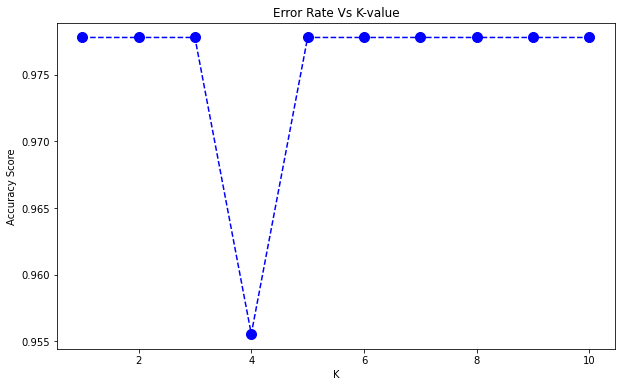

In [38]:
#Let's try and select the best K-value
acc_score = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xp_train,yp_train)
    pred_i = knn.predict(Xp_test)
    acc_score.append(np.mean(accuracy_score(yp_test,pred_i)))

plt.figure(figsize=(10,6))
plt.plot(range(1,11),acc_score,color='blue',linestyle='dashed',marker='o',markersize=10)
plt.title('Error Rate Vs K-value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

### 4.3 Support Vector Machine (SVM)

In [39]:
model = SVC()
model.fit(Xp_train,yp_train)
y_pred = model.predict(Xp_test)
print('SVM has an accuracy of:',accuracy_score(yp_test,y_pred)*100)

SVM has an accuracy of: 97.77777777777777


### 4.4 Decision Tree

In [40]:
DTC = DecisionTreeClassifier()
DTC.fit(Xp_train,yp_train)
y_pred = DTC.predict(Xp_test)
print('Decision Tree Classifier has an accuracy of:',accuracy_score(yp_test,y_pred)*100)

Decision Tree Classifier has an accuracy of: 95.55555555555556


### 5. Model Building Using Sepal Features

In [41]:
Xs = df.iloc[:,0:2]
Ys = df.iloc[:,-1]
Xs_train,Xs_test,ys_train,ys_test = train_test_split(Xs,Ys,test_size=0.3,random_state=0)

In [42]:
Xs.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [43]:
Ys.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### 5.1 Logistic Regression

In [44]:
logregs = LogisticRegression()
logregs.fit(Xs_train,ys_train)
y_pred = logregs.predict(Xs_test)
print('Logistic Regression has an accuracy of:',accuracy_score(ys_test,y_pred)*100)

Logistic Regression has an accuracy of: 82.22222222222221


### 5.2 K-Nearest Neighbors

In [45]:
#For K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xs_train,ys_train)
y_pred = knn.predict(Xs_test)
print('KNN with K=1 has an accuracy of:',accuracy_score(ys_test,y_pred)*100)

KNN with K=1 has an accuracy of: 66.66666666666666


In [46]:
#For K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xs_train,ys_train)
y_pred = knn.predict(Xs_test)
print('KNN with K=3 has an accuracy of:',accuracy_score(ys_test,y_pred)*100)

KNN with K=3 has an accuracy of: 73.33333333333333


In [47]:
#For K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xs_train,ys_train)
y_pred = knn.predict(Xs_test)
print('KNN with K=5 has an accuracy of:',accuracy_score(ys_test,y_pred)*100)

KNN with K=5 has an accuracy of: 73.33333333333333


Text(0, 0.5, 'Accuracy Score')

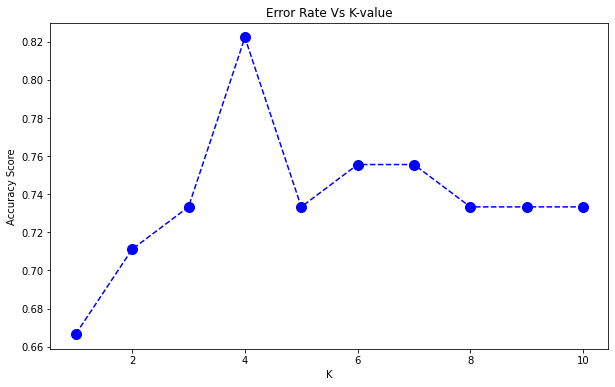

In [48]:
#Let's try and select the best K-value
acc_score = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xs_train,ys_train)
    pred_i = knn.predict(Xs_test)
    acc_score.append(np.mean(accuracy_score(ys_test,pred_i)))

plt.figure(figsize=(10,6))
plt.plot(range(1,11),acc_score,color='blue',linestyle='dashed',marker='o',markersize=10)
plt.title('Error Rate Vs K-value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

### 5.3 Support Vector Machines (SVM)

In [49]:
model = SVC()
model.fit(Xs_train,ys_train)
y_pred = model.predict(Xs_test)
print('SVM has an accuracy of:',accuracy_score(ys_test,y_pred)*100)

SVM has an accuracy of: 80.0


### 5.4 Decision Tree

In [50]:
DTC = DecisionTreeClassifier()
DTC.fit(Xs_train,ys_train)
y_pred = DTC.predict(Xs_test)
print('Decision Tree Classifier has an accuracy of:',accuracy_score(ys_test,y_pred)*100)

Decision Tree Classifier has an accuracy of: 64.44444444444444


**Observations:** As expected, we can see that model having sepal features are better at predicting the results than sepal features. We'll use Logistic Regression model for deployment!

## 6. Pickle File

In [52]:
#Write to disk to use it any number of times
import pickle
file = open('iris.pkl','wb')
pickle.dump(logregp,file)
loaded_model = pickle.load(open('iris.pkl','rb'))

In [53]:
final_pred = loaded_model.predict(Xp_test)

In [54]:
print('Our Final model has an accuracy of:',accuracy_score(yp_test,final_pred)*100)

Our Final model has an accuracy of: 97.77777777777777
